In [ ]:
import numpy as np 
import pandas as pd
import string
import re
import nltk
nltk.download('wordnet')
import nltk.probability
from matplotlib.pyplot import plot
from nltk import ngrams
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.stem.wordnet import WordNetLemmatizer
from google.colab import drive
import matplotlib.pyplot as plt
from nltk.stem.isri import ISRIStemmer
import gensim #library for topic modeling
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora, models
!pip install --upgrade arabic-reshaper
!pip install python-bidi
from bidi.algorithm import get_display  
from wordcloud import WordCloud
import arabic_reshaper

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Fonction qui permet d'ouvrir un fichier
def openFile(lien) :
  file = open(lien,'r');
  return file;

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Fonction qui transforme le fichier texte en liste ligne par ligne
def FileToList(lien) :
  drive.mount("/content/gdrive") #connexion avec le drive
  file = open(lien,"r")
  List = file.read().splitlines();
  file.close()
  return List;

In [ ]:
#Fonction qui transforme le fichier texte en texte
def FileToString(lien) :
  drive.mount("/content/gdrive") #connexion avec le drive
  file = openFile(lien)
  str = file.read();
  file.close()
  return str;

In [ ]:
#Fonction qui supprime les signes diacritiques et renvoie la version propre 
def remove_diacritics(string):
    regex = re.compile(r'[\u0610\u0611\u0612\u0613\u0614\u0615\u0616\u0617\u0618\u0619\u061A\u064B\u064C\u064D\u064E\u064F\u0650\u0651\u0652\u0653\u0654\u0655\u0656\u0657\u0658\u0659\u065A\u065B\u065C\u065D\u065E\u065F\u06D6\u06D7\u06D8\u06D9\u06DA\u06DB\u06DC\u06DF\u06E0\u06E1\u06E2\u06E3\u06E4\u06E5\u06E6\u06E7\u06E8\u06EA\u06EB\u06EC\u06ED]')
    return re.sub(regex, '', string)

In [ ]:
#Fonction qui supprime les nombres et renvoie la version propre
def remove_numbers(string):
    regex = re.compile(r"[0-9]+[|][0-9]+[|]")
    return re.sub(regex, ' ', string)

In [ ]:
#Fonction qui supprime les sajdah signs et rub-el-hizb signs et renvoie la version propre
def remove_signs(string):
    regex = re.compile(r"[\u06DE\u06D7\u06E9\u06DB\u06D6]")
    return re.sub(regex, ' ', string)

In [ ]:
#Fonction qui supprime les espaces supplémentaires
def remove_extra_whitespace(string):
    string = re.sub(r'\s+', ' ', string)
    return re.sub(r"\s{2,}", " ", string).strip()

In [ ]:
def correct_3ala(string):
  return string.replace("عَلَىٰ", "على")

In [ ]:
def correct_ila(string):
  return string.replace("إِلَىٰ","إلى")

In [ ]:
#Fonction qui fait le pré-traitement du texte (preprocessing)
def clean_text(string) :
    string = correct_3ala(string)
    string = correct_ila(string)
    string = remove_diacritics(string)
    string = string.replace("\n","")
    string = string.replace("\u0671","\u0627") #ARABIC LETTER ALEF WASLA
    string = string.replace("\u0670","\u0627") #ARABIC LETTER SUPERSCRIPT ALEF
    string = remove_signs(string)
    string = remove_numbers(string)
    string = remove_extra_whitespace(string)
    return string

In [ ]:
def StringToList(string) :
  return string.split()

In [ ]:
def frameWordsLength(list) :
  wordsArray = np.array(list)
  dataframe = pd.DataFrame(wordsArray, columns = ['Word'])
  dataframe.index = np.arange(1, len(dataframe)+1)
  dataframe['Length'] = dataframe.Word.apply(lambda x: len(x))
  return dataframe

In [ ]:
#Affichage nombre total de mots
def NumberOfWords(list) :
  string = "Le nombre total de mots est : " + str(len(list))
  return string

In [ ]:
def MaxLenWord(df_words) :
  print('Les mots les plus longs sont \n\n')
  return df_words.loc[df_words.Length == max(df_words.Length)]

In [ ]:
def MinLenWord(df_words) :
  print('Les mots les plus courts sont \n\n')
  return df_words.loc[df_words.Length == min(df_words.Length)]

In [ ]:
def AvgLenWord(df_words) :
  AverageLenWord = df_words["Length"].mean()
  print('La moyenne des longueurs des mots est : ')
  return AverageLenWord

In [ ]:
#Fonction qui supprime les mots vides
def remove_stopwords(list):
  return [word for word in list if word not in stopwords]

In [ ]:
#Fonction qui supprime l'expression basmala
def remove_basmala(strings):
  return strings.replace('بسم الله الرحمـان الرحيم ', '')

In [ ]:
#Fonction qui permet la tokénisation des mots
def tokenisation(string):
  return StringToList(string)

In [ ]:
def generate_N_grams(list,ngram=2):
  temp=zip(*[list[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

In [ ]:
def WordsFreq(list):
  return FreqDist(list)

In [ ]:
def WordsFreqMostCommon(wordsfreq):
  return wordsfreq.most_common(50)

In [ ]:
import matplotlib.ticker as ticker
def showPlotWords(list,text):
  text = "Fréquence des " + text + " les plus utilisés"
  a = [i[0] for i in list.most_common(10)]
  a1 = []
  for i in a:
    reshaped_text = arabic_reshaper.reshape(i)
    artext = get_display(reshaped_text)
    a1.append(artext)
  plt.figure(figsize=(30,10))
  x = a1
  y = [i[1] for i in list.most_common(10)]
  fig=plt.figure()
  ax=fig.add_axes([0,0,1,1])
  plt.title(text)
  plt.xlabel("Mots")
  plt.ylabel("Fréquence")
  #Function to avoid overlapping
  plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
  ax.bar(x,y)
  plt.show()
  return plt

In [ ]:
def MaxLenVer(df_quran):
  print('Informations sur le plus long verset \n\n')
  return df_quran.loc[df_quran.VerLen == max(df_quran.VerLen)]

In [ ]:
def MinLenVer(df_quran):
  print('Informations sur le plus court verset \n\n')
  return df_quran.loc[df_quran.VerLen == min(df_quran.VerLen)]

In [ ]:
#Affichage du texte propre
strFile = FileToString("/content/gdrive/MyDrive/quran/quran-uthmani.txt")
strFile = clean_text(strFile)
strFile

Mounted at /content/gdrive


'بسم الله الرحمـان الرحيم الحمد لله رب العـالمين الرحمـان الرحيم مـالك يوم الدين إياك نعبد وإياك نستعين اهدنا الصراط المستقيم صراط الذين أنعمت عليهم غير المغضوب عليهم ولا الضالين بسم الله الرحمـان الرحيم الم ذالك الكتـاب لا ريب فيه هدى للمتقين الذين يؤمنون بالغيب ويقيمون الصلواة ومما رزقنـاهم ينفقون والذين يؤمنون بما أنزل إليك وما أنزل من قبلك وبالـاخرة هم يوقنون أولـائك على هدى من ربهم وأولـائك هم المفلحون إن الذين كفروا سواء عليهم ءأنذرتهم أم لم تنذرهم لا يؤمنون ختم الله على قلوبهم وعلى سمعهم وعلى أبصـارهم غشـاوة ولهم عذاب عظيم ومن الناس من يقول ءامنا بالله وباليوم الـاخر وما هم بمؤمنين يخـادعون الله والذين ءامنوا وما يخدعون إلا أنفسهم وما يشعرون فى قلوبهم مرض فزادهم الله مرضا ولهم عذاب أليم بما كانوا يكذبون وإذا قيل لهم لا تفسدوا فى الأرض قالوا إنما نحن مصلحون ألا إنهم هم المفسدون ولـاكن لا يشعرون وإذا قيل لهم ءامنوا كما ءامن الناس قالوا أنؤمن كما ءامن السفهاء ألا إنهم هم السفهاء ولـاكن لا يعلمون وإذا لقوا الذين ءامنوا قالوا ءامنا وإذا خلوا إلى شيـاطينهم قالوا إنا معكم إنما نحن مسته

In [ ]:
#Affichage du nombre total de mot
wordsList = StringToList(strFile)
NumberOfWords(wordsList)

'Le nombre total de mots est : 77881'

In [ ]:
#Affichage dataframe nombre de caractere par mot 
df_words = frameWordsLength(wordsList)
df_words

Word  Length
1           بسم       3
2          الله       4
3      الرحمـان       8
4        الرحيم       6
5         الحمد       5
...         ...     ...
77877      صدور       4
77878     الناس       5
77879        من       2
77880     الجنة       5
77881    والناس       6

[77881 rows x 2 columns]

In [ ]:
#Affichage des mots avec le nombre minimal de caractères
MinLenWord(df_words)

Les mots les plus courts sont 




Word  Length
58409    ص       1
66988    ق       1
73062    ن       1

In [ ]:
#Affichage des mots avec le nombre maximal de caractères
MaxLenWord(df_words)

Les mots les plus longs sont 




Word  Length
25051  والمنـافقـات      12
25072  والمنـافقـات      12
33711  فأسقينـاكموه      12
55133  والمنـافقـات      12
66137  والمنـافقـات      12
69699  والمنـافقـات      12

In [ ]:
AvgLenWord(df_words)

La moyenne des longueurs des mots est : 


4.410292625929302

In [ ]:
#Importation de la liste des mots vides
stopwords = FileToList("/content/gdrive/MyDrive/quran/stopwordslist.txt")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Suppression des mots vides et de l'expression 'Basmala'
strFileNoBasmala = remove_basmala(strFile)
strFileNoBasmala

'الحمد لله رب العـالمين الرحمـان الرحيم مـالك يوم الدين إياك نعبد وإياك نستعين اهدنا الصراط المستقيم صراط الذين أنعمت عليهم غير المغضوب عليهم ولا الضالين الم ذالك الكتـاب لا ريب فيه هدى للمتقين الذين يؤمنون بالغيب ويقيمون الصلواة ومما رزقنـاهم ينفقون والذين يؤمنون بما أنزل إليك وما أنزل من قبلك وبالـاخرة هم يوقنون أولـائك على هدى من ربهم وأولـائك هم المفلحون إن الذين كفروا سواء عليهم ءأنذرتهم أم لم تنذرهم لا يؤمنون ختم الله على قلوبهم وعلى سمعهم وعلى أبصـارهم غشـاوة ولهم عذاب عظيم ومن الناس من يقول ءامنا بالله وباليوم الـاخر وما هم بمؤمنين يخـادعون الله والذين ءامنوا وما يخدعون إلا أنفسهم وما يشعرون فى قلوبهم مرض فزادهم الله مرضا ولهم عذاب أليم بما كانوا يكذبون وإذا قيل لهم لا تفسدوا فى الأرض قالوا إنما نحن مصلحون ألا إنهم هم المفسدون ولـاكن لا يشعرون وإذا قيل لهم ءامنوا كما ءامن الناس قالوا أنؤمن كما ءامن السفهاء ألا إنهم هم السفهاء ولـاكن لا يعلمون وإذا لقوا الذين ءامنوا قالوا ءامنا وإذا خلوا إلى شيـاطينهم قالوا إنا معكم إنما نحن مستهزءون الله يستهزئ بهم ويمدهم فى طغيـانهم يعمهون أول

In [ ]:
#Tokénisation des mots
wordsListNoBasmala = tokenisation(strFileNoBasmala)

In [ ]:
words_freq = WordsFreq(wordsListNoBasmala)
WordsFreqMostCommon(words_freq)

[('من', 2763),
 ('الله', 2151),
 ('فى', 1185),
 ('ما', 1013),
 ('إن', 966),
 ('لا', 812),
 ('الذين', 811),
 ('على', 686),
 ('إلا', 664),
 ('ولا', 658),
 ('وما', 646),
 ('أن', 638),
 ('إلى', 430),
 ('قال', 412),
 ('لهم', 373),
 ('ومن', 342),
 ('ثم', 340),
 ('لكم', 337),
 ('به', 327),
 ('كان', 323),
 ('بما', 296),
 ('قل', 294),
 ('الأرض', 287),
 ('ذالك', 280),
 ('أو', 280),
 ('له', 275),
 ('الذى', 268),
 ('هو', 265),
 ('ءامنوا', 263),
 ('هم', 261),
 ('وإن', 254),
 ('قالوا', 250),
 ('كل', 245),
 ('فيها', 241),
 ('والله', 240),
 ('كانوا', 229),
 ('عن', 223),
 ('إذا', 221),
 ('ربك', 220),
 ('يوم', 217),
 ('عليهم', 214),
 ('شىء', 190),
 ('هـاذا', 190),
 ('كفروا', 189),
 ('كنتم', 188),
 ('الناس', 182),
 ('السمـاوات', 182),
 ('لم', 178),
 ('وهو', 171),
 ('فإن', 168)]

In [ ]:
#Génération des 2-Grams et leur fréquence
_2_grams = generate_N_grams(wordsListNoBasmala,2)
_2_grams_words_freq = WordsFreq(_2_grams)
WordsFreqMostCommon(_2_grams_words_freq)

[('إن الله', 205),
 ('الذين ءامنوا', 184),
 ('فى الأرض', 176),
 ('الذين كفروا', 134),
 ('السمـاوات والأرض', 133),
 ('من قبل', 92),
 ('يـاأيها الذين', 92),
 ('من الله', 89),
 ('كل شىء', 87),
 ('إن الذين', 84),
 ('من بعد', 84),
 ('من دون', 83),
 ('إن كنتم', 80),
 ('دون الله', 72),
 ('على الله', 72),
 ('الله من', 71),
 ('فى السمـاوات', 71),
 ('ما فى', 69),
 ('سبيل الله', 69),
 ('الله لا', 63),
 ('من يشاء', 62),
 ('عند الله', 61),
 ('الحيواة الدنيا', 61),
 ('يوم القيـامة', 60),
 ('إن فى', 57),
 ('على كل', 56),
 ('وعملوا الصـالحـات', 53),
 ('ما كانوا', 53),
 ('الله إن', 52),
 ('أن الله', 52),
 ('فى ذالك', 52),
 ('من السماء', 51),
 ('وما كان', 51),
 ('ءامنوا وعملوا', 50),
 ('لكم من', 49),
 ('إلا أن', 48),
 ('الله على', 47),
 ('فإن الله', 47),
 ('الله ما', 46),
 ('إلا من', 46),
 ('فى سبيل', 45),
 ('الله ورسوله', 44),
 ('لا يؤمنون', 43),
 ('لا يعلمون', 43),
 ('بما كانوا', 42),
 ('غفور رحيم', 42),
 ('حتىا إذا', 42),
 ('بما تعملون', 41),
 ('خـالدين فيها', 40),
 ('إلـاه إلا', 40)]

Histogramme des 2-Grams les plus fréquents


<Figure size 2160x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


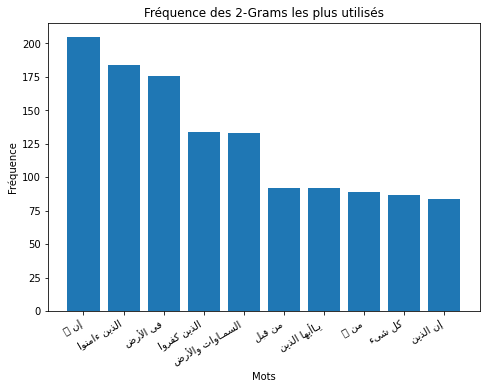

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
print("Histogramme des 2-Grams les plus fréquents")
showPlotWords(_2_grams_words_freq,"2-Grams")

In [ ]:
#Génération des 3-Grams et leur fréquence
_3_grams = generate_N_grams(wordsListNoBasmala,3)
_3_grams_words_freq = WordsFreq(_3_grams)
WordsFreqMostCommon(_3_grams_words_freq)

[('يـاأيها الذين ءامنوا', 89),
 ('من دون الله', 71),
 ('على كل شىء', 52),
 ('ءامنوا وعملوا الصـالحـات', 50),
 ('إن فى ذالك', 50),
 ('فى سبيل الله', 44),
 ('ما فى السمـاوات', 39),
 ('لا إلـاه إلا', 37),
 ('الذين ءامنوا وعملوا', 36),
 ('تجرى من تحتها', 34),
 ('من تحتها الأنهـار', 34),
 ('كل شىء قدير', 33),
 ('الله إن الله', 33),
 ('فبأى ءالاء ربكما', 31),
 ('ءالاء ربكما تكذبان', 31),
 ('فى السمـاوات والأرض', 30),
 ('إلـاه إلا هو', 30),
 ('إن الله لا', 29),
 ('من بعد ما', 29),
 ('إن كنتم صـادقين', 28),
 ('خلق السمـاوات والأرض', 28),
 ('فى السمـاوات وما', 28),
 ('السمـاوات وما فى', 28),
 ('وما فى الأرض', 28),
 ('الذين ءامنوا لا', 27),
 ('جنـات تجرى من', 26),
 ('الذين من قبلهم', 24),
 ('عن سبيل الله', 24),
 ('فى ذالك لـايـات', 24),
 ('السمـاوات والأرض وما', 23),
 ('الله غفور رحيم', 22),
 ('إن الله كان', 22),
 ('من قبل أن', 21),
 ('كيف كان عـاقبة', 21),
 ('من السماء ماء', 20),
 ('فى ذالك لـاية', 20),
 ('تحتها الأنهـار خـالدين', 20),
 ('الأنهـار خـالدين فيها', 20),
 ('بالله واليوم الـاخر', 19

<Figure size 2160x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


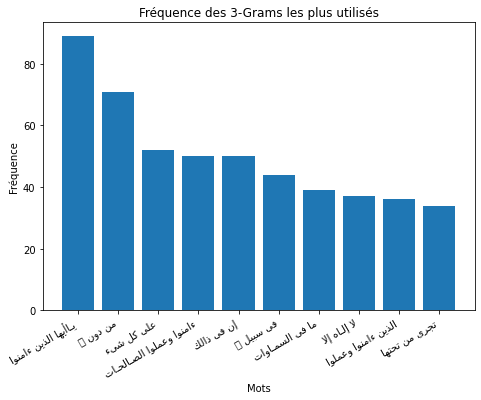

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
showPlotWords(_3_grams_words_freq,"3-Grams")

In [ ]:
#Génération des 4-Grams et leur fréquence
_4_grams = generate_N_grams(wordsListNoBasmala,4)
_4_grams_words_freq = WordsFreq(_4_grams)
WordsFreqMostCommon(_4_grams_words_freq)

[('الذين ءامنوا وعملوا الصـالحـات', 36),
 ('تجرى من تحتها الأنهـار', 34),
 ('على كل شىء قدير', 33),
 ('فبأى ءالاء ربكما تكذبان', 31),
 ('لا إلـاه إلا هو', 30),
 ('ما فى السمـاوات وما', 28),
 ('فى السمـاوات وما فى', 28),
 ('السمـاوات وما فى الأرض', 28),
 ('يـاأيها الذين ءامنوا لا', 27),
 ('جنـات تجرى من تحتها', 26),
 ('إن فى ذالك لـايـات', 24),
 ('إن فى ذالك لـاية', 20),
 ('تحتها الأنهـار خـالدين فيها', 20),
 ('من تحتها الأنهـار خـالدين', 19),
 ('الله على كل شىء', 17),
 ('ولـاكن أكثر الناس لا', 17),
 ('السمـاوات والأرض وما بينهما', 17),
 ('فى ذالك لـايـات لقوم', 14),
 ('خوف عليهم ولا هم', 12),
 ('عليهم ولا هم يحزنون', 12),
 ('إن الله غفور رحيم', 12),
 ('ألم تر إلى الذين', 12),
 ('والله لا يهدى القوم', 12),
 ('والله على كل شىء', 12),
 ('الذى خلق السمـاوات والأرض', 12),
 ('والذين ءامنوا وعملوا الصـالحـات', 11),
 ('له ما فى السمـاوات', 11),
 ('ما فى السمـاوات والأرض', 11),
 ('يـاأيها الذين ءامنوا إذا', 11),
 ('لله ما فى السمـاوات', 11),
 ('أكثر الناس لا يعلمون', 11),
 ('أصحـاب النار هم فيه

<Figure size 2160x720 with 0 Axes>

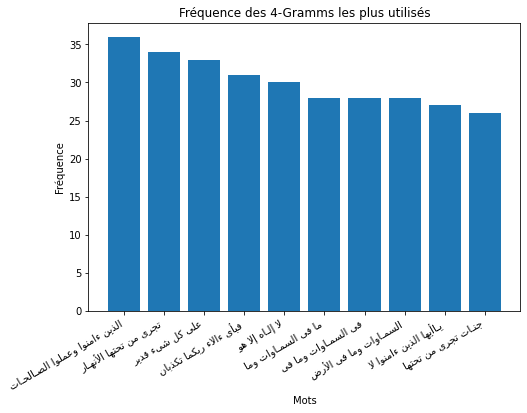

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
showPlotWords(_4_grams_words_freq,"4-Gramms")

In [ ]:
#Génération des 5-Grams et leur fréquence
_5_grams = generate_N_grams(wordsListNoBasmala,5)
_5_grams_words_freq = WordsFreq(_5_grams)
WordsFreqMostCommon(_5_grams_words_freq)

[('ما فى السمـاوات وما فى', 28),
 ('فى السمـاوات وما فى الأرض', 28),
 ('جنـات تجرى من تحتها الأنهـار', 26),
 ('تجرى من تحتها الأنهـار خـالدين', 19),
 ('من تحتها الأنهـار خـالدين فيها', 19),
 ('إن فى ذالك لـايـات لقوم', 14),
 ('خوف عليهم ولا هم يحزنون', 12),
 ('الله على كل شىء قدير', 11),
 ('ولـاكن أكثر الناس لا يعلمون', 11),
 ('أصحـاب النار هم فيها خـالدون', 10),
 ('إن الذين ءامنوا وعملوا الصـالحـات', 10),
 ('إن الله على كل شىء', 9),
 ('له ما فى السمـاوات وما', 9),
 ('والله على كل شىء قدير', 9),
 ('أظلم ممن افترىا على الله', 9),
 ('اعبدوا الله ما لكم من', 9),
 ('الله ما لكم من إلـاه', 9),
 ('ما لكم من إلـاه غيره', 9),
 ('الله لا إلـاه إلا هو', 8),
 ('من دون الله ما لا', 8),
 ('ممن افترىا على الله كذبا', 8),
 ('يـاقوم اعبدوا الله ما لكم', 8),
 ('إن فى ذالك لـاية وما', 8),
 ('فى ذالك لـاية وما كان', 8),
 ('ذالك لـاية وما كان أكثرهم', 8),
 ('لـاية وما كان أكثرهم مؤمنين', 8),
 ('وما كان أكثرهم مؤمنين وإن', 8),
 ('كان أكثرهم مؤمنين وإن ربك', 8),
 ('أكثرهم مؤمنين وإن ربك لهو', 8),
 ('مؤمنين 

In [ ]:
wordsListNoStopWords = remove_stopwords(wordsListNoBasmala)

In [ ]:
words_freq = WordsFreq(wordsListNoStopWords)
WordsFreqMostCommon(words_freq)

[('الله', 2151),
 ('قل', 294),
 ('الأرض', 287),
 ('ذالك', 280),
 ('ءامنوا', 263),
 ('قالوا', 250),
 ('والله', 240),
 ('كانوا', 229),
 ('ربك', 220),
 ('عليهم', 214),
 ('شىء', 190),
 ('هـاذا', 190),
 ('كفروا', 189),
 ('كنتم', 188),
 ('الناس', 182),
 ('السمـاوات', 182),
 ('والذين', 164),
 ('عليكم', 164),
 ('الكتـاب', 163),
 ('والأرض', 157),
 ('إنا', 156),
 ('فلا', 156),
 ('منهم', 153),
 ('عذاب', 150),
 ('إنه', 147),
 ('يـاأيها', 142),
 ('حتىا', 142),
 ('بالله', 139),
 ('وهم', 137),
 ('وإذا', 134),
 ('أولـائك', 133),
 ('إنى', 131),
 ('ولقد', 129),
 ('رب', 128),
 ('لله', 116),
 ('خير', 116),
 ('يشاء', 116),
 ('الدنيا', 115),
 ('إنما', 113),
 ('ولـاكن', 112),
 ('ربهم', 111),
 ('ولو', 111),
 ('السماء', 109),
 ('الحق', 109),
 ('منكم', 107),
 ('عليم', 106),
 ('ربنا', 106),
 ('ربكم', 102),
 ('النار', 102),
 ('فلما', 101)]

<Figure size 2160x720 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


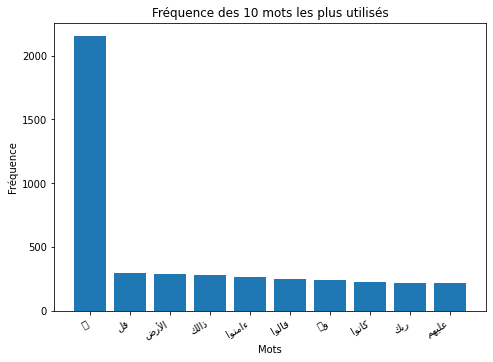

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
#Visualisation des fréquences
showPlotWords(words_freq,"10 mots")

In [ ]:
st = ISRIStemmer()
for word in wordsListNoStopWords:
  print(word, " : ", st.stem(word))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
ذاقوا  :  ذاق
وبال  :  وبل
أمرهم  :  امر
ولهم  :  لهم
عذاب  :  عذب
أليم  :  الم
كمثل  :  كمثل
الشيطـان  :  شيطـ
للإنسـان  :  نسـ
اكفر  :  كفر
فلما  :  فلم
كفر  :  كفر
إنى  :  انى
برىء  :  رىء
منك  :  منك
إنى  :  انى
أخاف  :  اخف
الله  :  الل
رب  :  رب
العـالمين  :  عـلم
عـاقبتهما  :  عـقب
أنهما  :  انه
النار  :  نار
خـالدين  :  خـلد
وذالك  :  وذل
جزاؤا  :  جزؤ
الظـالمين  :  ظـلم
يـاأيها  :  يـأ
ءامنوا  :  ءمن
اتقوا  :  اتق
الله  :  الل
ولتنظر  :  نظر
قدمت  :  قدم
لغد  :  لغد
واتقوا  :  وتق
الله  :  الل
الله  :  الل
خبير  :  خبر
تعملون  :  عمل
تكونوا  :  تكن
كالذين  :  ذين
نسوا  :  نسا
الله  :  الل
فأنسىاهم  :  أنسى
أنفسهم  :  نفس
أولـائك  :  لـئ
الفـاسقون  :  ـسق
يستوى  :  سوى
أصحـاب  :  صحـاب
النار  :  نار
وأصحـاب  :  أصحـاب
الجنة  :  جنة
أصحـاب  :  صحـاب
الجنة  :  جنة
الفائزون  :  فئز
أنزلنا  :  نزل
هـاذا  :  هـذ
القرءان  :  قرء
جبل  :  جبل
لرأيته  :  لرأ
خـاشعا  :  خـشع
متصدعا  :  تصدع
خشية  :  خشة
الله  :

In [ ]:
#Extraction de la data du fichier texte dans une liste de versets (Tokénisation de phrases)
quranList = FileToList("/content/gdrive/MyDrive/quran/quran-simple-clean-nbrSourat.txt")
quranList

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


['1|1|بسم الله الرحمن الرحيم',
 '1|2|الحمد لله رب العالمين',
 '1|3|الرحمن الرحيم',
 '1|4|مالك يوم الدين',
 '1|5|إياك نعبد وإياك نستعين',
 '1|6|اهدنا الصراط المستقيم',
 '1|7|صراط الذين أنعمت عليهم غير المغضوب عليهم ولا الضالين',
 '2|1|بسم الله الرحمن الرحيم الم',
 '2|2|ذلك الكتاب لا ريب فيه هدى للمتقين',
 '2|3|الذين يؤمنون بالغيب ويقيمون الصلاة ومما رزقناهم ينفقون',
 '2|4|والذين يؤمنون بما أنزل إليك وما أنزل من قبلك وبالآخرة هم يوقنون',
 '2|5|أولئك على هدى من ربهم وأولئك هم المفلحون',
 '2|6|إن الذين كفروا سواء عليهم أأنذرتهم أم لم تنذرهم لا يؤمنون',
 '2|7|ختم الله على قلوبهم وعلى سمعهم وعلى أبصارهم غشاوة ولهم عذاب عظيم',
 '2|8|ومن الناس من يقول آمنا بالله وباليوم الآخر وما هم بمؤمنين',
 '2|9|يخادعون الله والذين آمنوا وما يخدعون إلا أنفسهم وما يشعرون',
 '2|10|في قلوبهم مرض فزادهم الله مرضا ولهم عذاب أليم بما كانوا يكذبون',
 '2|11|وإذا قيل لهم لا تفسدوا في الأرض قالوا إنما نحن مصلحون',
 '2|12|ألا إنهم هم المفسدون ولكن لا يشعرون',
 '2|13|وإذا قيل لهم آمنوا كما آمن الناس قالوا أنؤمن كما آمن

In [ ]:
#Fonction qui permet de calculer le nombre de versets dans tout le coran
def nbrVerFullQuran(list):
  print("Le nombre de versets dans tout le coran est ", len(list))

In [ ]:
#Affichage nombre de Ayat dans tout le Coran
nbrVerFullQuran(quranList)

Le nombre de versets dans tout le coran est  6236


In [ ]:
def decomposition_list(list):
  #Etape 1 : Séparation du verset du numéro de la soura et du numéro du verset de chaque élément de la liste
  etape1 = []
  p=[]
  for i in list :
    p = i.split('|')
    etape1 += p

  #Etape 2 : Réassemblage des 3 éléments (numéro de la soura, numero du verset, le verset) dans une liste
  #Obtention d'une liste de listes de 3 éléments
  n=3
  etape2=[etape1[i:i + n] for i in range(0, len(etape1), n)]

  return etape2

In [ ]:
#Transformation de la liste en tableau
def list_to_array(list):
  array = np.array(list)
  return array

In [ ]:
verList = decomposition_list(quranList)
verArray = list_to_array(verList)
verArray

array([['1', '1', 'بسم الله الرحمن الرحيم'],
       ['1', '2', 'الحمد لله رب العالمين'],
       ['1', '3', 'الرحمن الرحيم'],
       ...,
       ['114', '4', 'من شر الوسواس الخناس'],
       ['114', '5', 'الذي يوسوس في صدور الناس'],
       ['114', '6', 'من الجنة والناس']], dtype='<U679')

In [ ]:
#Suppression du numéro de la soura et du numéro du verset
quranCleanArray = verArray[:,2]
quranCleanArray

array(['بسم الله الرحمن الرحيم', 'الحمد لله رب العالمين', 'الرحمن الرحيم',
       ..., 'من شر الوسواس الخناس', 'الذي يوسوس في صدور الناس',
       'من الجنة والناس'], dtype='<U679')

In [ ]:
# dans cette etape , on visualise tout les versets du coran, leur numero dans chaque Soura et leur numero dans tout le Coran
# dans cette etape, on ajoute a la DataFrame une colonne contenant la longueur de chaque verset 
df_ver = pd.DataFrame(verArray, columns = ['NumSoura','NumVerSoura','Verset'])
df_ver.index = np.arange(1, len(df_ver)+1)
df_ver.index.name = "NumVerQuran"
df_ver['VerLen'] = df_ver.Verset.apply(lambda x: len(x))
df_ver

NumSoura NumVerSoura                    Verset  VerLen
NumVerQuran                                                       
1                  1           1    بسم الله الرحمن الرحيم      22
2                  1           2     الحمد لله رب العالمين      21
3                  1           3             الرحمن الرحيم      13
4                  1           4            مالك يوم الدين      14
5                  1           5    إياك نعبد وإياك نستعين      22
...              ...         ...                       ...     ...
6232             114           2                 ملك الناس       9
6233             114           3                 إله الناس       9
6234             114           4      من شر الوسواس الخناس      20
6235             114           5  الذي يوسوس في صدور الناس      24
6236             114           6           من الجنة والناس      15

[6236 rows x 4 columns]

In [ ]:
#Affichage informations plus long verset
MaxLenVer(df_ver)

Informations sur le plus long verset 




NumSoura NumVerSoura  \
NumVerQuran                        
289                2         282   

                                                        Verset  VerLen  
NumVerQuran                                                             
289          يا أيها الذين آمنوا إذا تداينتم بدين إلى أجل م...     679

In [ ]:
#Affichage informations plus court verset
MinLenVer(df_ver)

Informations sur le plus court verset 




NumSoura NumVerSoura Verset  VerLen
NumVerQuran                                    
4274              42           2    عسق       3

In [ ]:
longest_string = max(verArray[:,2], key=len)
longest_string 

'يا أيها الذين آمنوا إذا تداينتم بدين إلى أجل مسمى فاكتبوه وليكتب بينكم كاتب بالعدل ولا يأب كاتب أن يكتب كما علمه الله فليكتب وليملل الذي عليه الحق وليتق الله ربه ولا يبخس منه شيئا فإن كان الذي عليه الحق سفيها أو ضعيفا أو لا يستطيع أن يمل هو فليملل وليه بالعدل واستشهدوا شهيدين من رجالكم فإن لم يكونا رجلين فرجل وامرأتان ممن ترضون من الشهداء أن تضل إحداهما فتذكر إحداهما الأخرى ولا يأب الشهداء إذا ما دعوا ولا تسأموا أن تكتبوه صغيرا أو كبيرا إلى أجله ذلكم أقسط عند الله وأقوم للشهادة وأدنى ألا ترتابوا إلا أن تكون تجارة حاضرة تديرونها بينكم فليس عليكم جناح ألا تكتبوها وأشهدوا إذا تبايعتم ولا يضار كاتب ولا شهيد وإن تفعلوا فإنه فسوق بكم واتقوا الله ويعلمكم الله والله بكل شيء عليم'

In [ ]:
divided_quran = []
for i in range(1,115):
  j = list(verArray[:,0]).index(str(i))
  if i == 114:
    divided_quran.append(verList[j:])
    continue
  k = list(verArray[:,0]).index(str(i+1))
  divided_quran.append(verList[j:k])

for i in range(len(divided_quran)):
  divided_quran[i] = np.array(divided_quran[i])

divided_quran

[array([['1', '1', 'بسم الله الرحمن الرحيم'],
        ['1', '2', 'الحمد لله رب العالمين'],
        ['1', '3', 'الرحمن الرحيم'],
        ['1', '4', 'مالك يوم الدين'],
        ['1', '5', 'إياك نعبد وإياك نستعين'],
        ['1', '6', 'اهدنا الصراط المستقيم'],
        ['1', '7', 'صراط الذين أنعمت عليهم غير المغضوب عليهم ولا الضالين']],
       dtype='<U52'), array([['2', '1', 'بسم الله الرحمن الرحيم الم'],
        ['2', '2', 'ذلك الكتاب لا ريب فيه هدى للمتقين'],
        ['2', '3',
         'الذين يؤمنون بالغيب ويقيمون الصلاة ومما رزقناهم ينفقون'],
        ['2', '4',
         'والذين يؤمنون بما أنزل إليك وما أنزل من قبلك وبالآخرة هم يوقنون'],
        ['2', '5', 'أولئك على هدى من ربهم وأولئك هم المفلحون'],
        ['2', '6',
         'إن الذين كفروا سواء عليهم أأنذرتهم أم لم تنذرهم لا يؤمنون'],
        ['2', '7',
         'ختم الله على قلوبهم وعلى سمعهم وعلى أبصارهم غشاوة ولهم عذاب عظيم'],
        ['2', '8',
         'ومن الناس من يقول آمنا بالله وباليوم الآخر وما هم بمؤمنين'],
        ['2', 

In [ ]:
def LongVerPerSoura(tab):
  L = []
  for i in range (114) :
    LongVerPerSoura = max(tab[i][:,2], key=len)
    L.append(LongVerPerSoura)
  return L

In [ ]:
def ShortVerPerSoura(tab):
  S = []
  for i in range (114) :
    ShortestAyaSoura = min(tab[i][:,2], key=len)
    S.append(ShortestAyaSoura)
  return S

In [ ]:
#Longest Aya in each sourat INDEX
def LongIndPerSoura(tab):
  Lindex = []
  A = []
  for i in range (114) :
    A = list(tab[i][:,2])
    LonguestAyaSoura = max(A, key=len)
    j = A.index(LonguestAyaSoura)
    Lindex.append(j+1)
  return Lindex

In [ ]:
#Shortest Aya in each sourat INDEX
def ShortIndPerSoura(tab):
  Sindex = []
  A= []
  for i in range (114) :
    A = list(tab[i][:,2])
    ShortestAyaSoura = min(A, key=len)
    j = A.index(ShortestAyaSoura)
    Sindex.append(j+1)
  return Sindex

In [ ]:
def nbrAyatPerSoura(tab):
  B = []
  for i in range (114) :
    x = len(tab[i])
    B.append(x)
  return B

In [ ]:
df_soura = pd.DataFrame(divided_quran, columns = ['Soura'])
df_soura.index = np.arange(1, len(df_soura)+1)
df_soura.index.name = "souraNum"
df_soura['NbrAyatSoura'] = nbrAyatPerSoura(divided_quran)
df_soura['LongestAyaSoura'] = LongVerPerSoura(divided_quran)
df_soura['LongestAyaSouraLen'] = df_soura.LongestAyaSoura.apply(lambda x: len(x))
df_soura['LongestAyaSouraNum'] = LongIndPerSoura(divided_quran)
df_soura['ShortestAyaSoura'] = ShortVerPerSoura(divided_quran)
df_soura['ShortestAyaSouraLen'] = df_soura.ShortestAyaSoura.apply(lambda x: len(x))
df_soura['ShortestAyaSouraNum'] = ShortIndPerSoura(divided_quran)
df_soura

/usr/local/lib/python3.7/dist-packages/pandas/core/internals/construction.py:540: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


Soura  NbrAyatSoura  \
souraNum                                                                    
1         [[1, 1, بسم الله الرحمن الرحيم], [1, 2, الحمد ...             7   
2         [[2, 1, بسم الله الرحمن الرحيم الم], [2, 2, ذل...           286   
3         [[3, 1, بسم الله الرحمن الرحيم الم], [3, 2, ال...           200   
4         [[4, 1, بسم الله الرحمن الرحيم يا أيها الناس ا...           176   
5         [[5, 1, بسم الله الرحمن الرحيم يا أيها الذين آ...           120   
...                                                     ...           ...   
110       [[110, 1, بسم الله الرحمن الرحيم إذا جاء نصر ا...             3   
111       [[111, 1, بسم الله الرحمن الرحيم تبت يدا أبي ل...             5   
112       [[112, 1, بسم الله الرحمن الرحيم قل هو الله أح...             4   
113       [[113, 1, بسم الله الرحمن الرحيم قل أعوذ برب ا...             5   
114       [[114, 1, بسم الله الرحمن الرحيم قل أعوذ برب ا...             6   

                                            LongestAyaSoura  \
souraNum                                                      
1         صراط الذين أنعمت عليهم غير المغضوب عليهم ولا ا...   
2         يا أيها الذين آمنوا إذا تداينتم بدين إلى أجل م...   
3         ثم أنزل عليكم من بعد الغم أمنة نعاسا يغشى طائف...   
4         ولكم نصف ما ترك أزواجكم إن لم يكن لهن ولد فإن ...   
5         يا أيها الرسول لا يحزنك الذين يسارعون في الكفر...   
...                                                     ...   
110          بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح   
111              بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب   
112                   بسم الله الرحمن الرحيم قل هو الله أحد   
113                بسم الله الرحمن الرحيم قل أعوذ برب الفلق   
114                بسم الله الرحمن الرحيم قل أعوذ برب الناس   

          LongestAyaSouraLen  LongestAyaSouraNum  \
souraNum                                           
1                         52                   7   
2                        679                 282   
3                        365                 154   
4                        386                  12   
5                        348                  41   
...                      ...                 ...   
110                       46                   1   
111                       42                   1   
112                       37                   1   
113                       40                   1   
114                       40                   1   

                                    ShortestAyaSoura  ShortestAyaSouraLen  \
souraNum                                                                    
1                                      الرحمن الرحيم                   13   
2                           صم بكم عمي فهم لا يرجعون                   24   
3                         بسم الله الرحمن الرحيم الم                   26   
4                            ولهديناهم صراطا مستقيما                   23   
5         قد سألها قوم من قبلكم ثم أصبحوا بها كافرين                   42   
...                                              ...                  ...   
110             فسبح بحمد ربك واستغفره إنه كان توابا                   36   
111                               سيصلى نارا ذات لهب                   18   
112                                       الله الصمد                   10   
113                                     من شر ما خلق                   12   
114                                        ملك الناس                    9   

          ShortestAyaSouraNum  
souraNum                       
1                           3  
2                          18  
3                           1  
4                          68  
5                         102  
...                       ...  
110                         3  
111                         3  
112                         2  
113                         2  
114                         2  

[114 rows x 8 columns]

In [ ]:
df_soura.drop(['LongestAyaSoura', 'ShortestAyaSoura'], axis='columns', inplace=True)
df_soura

Soura  NbrAyatSoura  \
souraNum                                                                    
1         [[1, 1, بسم الله الرحمن الرحيم], [1, 2, الحمد ...             7   
2         [[2, 1, بسم الله الرحمن الرحيم الم], [2, 2, ذل...           286   
3         [[3, 1, بسم الله الرحمن الرحيم الم], [3, 2, ال...           200   
4         [[4, 1, بسم الله الرحمن الرحيم يا أيها الناس ا...           176   
5         [[5, 1, بسم الله الرحمن الرحيم يا أيها الذين آ...           120   
...                                                     ...           ...   
110       [[110, 1, بسم الله الرحمن الرحيم إذا جاء نصر ا...             3   
111       [[111, 1, بسم الله الرحمن الرحيم تبت يدا أبي ل...             5   
112       [[112, 1, بسم الله الرحمن الرحيم قل هو الله أح...             4   
113       [[113, 1, بسم الله الرحمن الرحيم قل أعوذ برب ا...             5   
114       [[114, 1, بسم الله الرحمن الرحيم قل أعوذ برب ا...             6   

          LongestAyaSouraLen  LongestAyaSouraNum  ShortestAyaSouraLen  \
souraNum                                                                
1                         52                   7                   13   
2                        679                 282                   24   
3                        365                 154                   26   
4                        386                  12                   23   
5                        348                  41                   42   
...                      ...                 ...                  ...   
110                       46                   1                   36   
111                       42                   1                   18   
112                       37                   1                   10   
113                       40                   1                   12   
114                       40                   1                    9   

          ShortestAyaSouraNum  
souraNum                       
1                           3  
2                          18  
3                           1  
4                          68  
5                         102  
...                       ...  
110                         3  
111                         3  
112                         2  
113                         2  
114                         2  

[114 rows x 6 columns]

In [ ]:
souraList = []
for i in range (114) :
  A = list(divided_quran[i][:,2])
  StrA = " ".join(A)
  souraList += [StrA]
souraList
df_Onlysoura = pd.DataFrame(souraList, columns = ['Soura'])
df_Onlysoura.index = np.arange(1, len(df_Onlysoura)+1)
df_Onlysoura.index.name = "souraNum"
df_Onlysoura

Soura
souraNum                                                   
1         بسم الله الرحمن الرحيم الحمد لله رب العالمين ا...
2         بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب ف...
3         بسم الله الرحمن الرحيم الم الله لا إله إلا هو ...
4         بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربك...
5         بسم الله الرحمن الرحيم يا أيها الذين آمنوا أوف...
...                                                     ...
110       بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح...
111       بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما ...
112       بسم الله الرحمن الرحيم قل هو الله أحد الله الص...
113       بسم الله الرحمن الرحيم قل أعوذ برب الفلق من شر...
114       بسم الله الرحمن الرحيم قل أعوذ برب الناس ملك ا...

[114 rows x 1 columns]

In [ ]:
#Fonction qui genere les word clouds
def print_word_cloud_ar(artext_list):
    """Takes a list of Arabic words to print cloud."""
    full_string = ' '.join(artext_list)
    reshaped_text = arabic_reshaper.reshape(full_string)
    artext = get_display(reshaped_text)
    
    # Build the Arabic word cloud
    wordc = WordCloud(font_path='/content/gdrive/MyDrive/quran/IBMPlexSansArabic-Bold.ttf',background_color='white',width=2000,height=1000).generate(artext)
    
    # Draw the word cloud
    plt.imshow(wordc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

In [ ]:
#data cleaning
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def cleanSoura(text):
  stop_free = ' '.join([word for word in text.lower().split() if word not in stopwords])
  punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
  normalized = ' '.join([lemma.lemmatize(word) for word in punc_free.split()])
  return normalized.split()

In [ ]:
#clean and split
def clean_and_split(string):
  string = clean_text(string)
  string = remove_basmala(string)
  cleanlist = StringToList(string)
  return remove_stopwords(cleanlist)

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
df_Onlysoura['CleanSoura']=df_Onlysoura['Soura'].apply(clean_and_split)
df_Onlysoura

Soura  \
souraNum                                                      
1         بسم الله الرحمن الرحيم الحمد لله رب العالمين ا...   
2         بسم الله الرحمن الرحيم الم ذلك الكتاب لا ريب ف...   
3         بسم الله الرحمن الرحيم الم الله لا إله إلا هو ...   
4         بسم الله الرحمن الرحيم يا أيها الناس اتقوا ربك...   
5         بسم الله الرحمن الرحيم يا أيها الذين آمنوا أوف...   
...                                                     ...   
110       بسم الله الرحمن الرحيم إذا جاء نصر الله والفتح...   
111       بسم الله الرحمن الرحيم تبت يدا أبي لهب وتب ما ...   
112       بسم الله الرحمن الرحيم قل هو الله أحد الله الص...   
113       بسم الله الرحمن الرحيم قل أعوذ برب الفلق من شر...   
114       بسم الله الرحمن الرحيم قل أعوذ برب الناس ملك ا...   

                                                 CleanSoura  
souraNum                                                     
1         [بسم, الله, الرحمن, الرحيم, الحمد, لله, رب, ال...  
2         [بسم, الله, الرحمن, الرحيم, الم, الكتاب, ريب, ...  
3         [بسم, الله, الرحمن, الرحيم, الم, الله, إله, ال...  
4         [بسم, الله, الرحمن, الرحيم, أيها, الناس, اتقوا...  
5         [بسم, الله, الرحمن, الرحيم, أيها, آمنوا, أوفوا...  
...                                                     ...  
110       [بسم, الله, الرحمن, الرحيم, جاء, نصر, الله, وا...  
111       [بسم, الله, الرحمن, الرحيم, تبت, يدا, أبي, لهب...  
112       [بسم, الله, الرحمن, الرحيم, قل, الله, الله, ال...  
113       [بسم, الله, الرحمن, الرحيم, قل, أعوذ, برب, الف...  
114       [بسم, الله, الرحمن, الرحيم, قل, أعوذ, برب, الن...  

[114 rows x 2 columns]

Word Cloud pour sourat الفاتحة


['بسم', 'الله', 'الرحمن', 'الرحيم', 'الحمد', 'لله', 'رب', 'العالمين', 'الرحمن', 'الرحيم', 'مالك', 'الدين', 'نعبد', 'وإياك', 'نستعين', 'اهدنا', 'الصراط', 'المستقيم', 'صراط', 'أنعمت', 'عليهم', 'المغضوب', 'عليهم', 'الضالين']


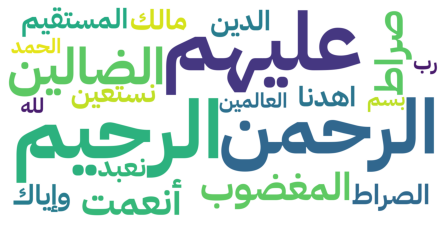

In [ ]:
L = list(df_Onlysoura['CleanSoura'])
print("Word Cloud pour sourat الفاتحة\n\n")
print(L[0])
print_word_cloud_ar(L[0])

Word Cloud pour sourat البقرة




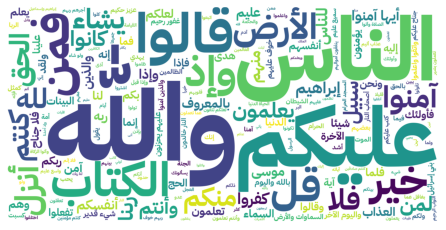

In [ ]:
L = list(df_Onlysoura['CleanSoura'])
print("Word Cloud pour sourat البقرة\n\n")
print_word_cloud_ar(L[1])

Word Cloud pour tout le coran




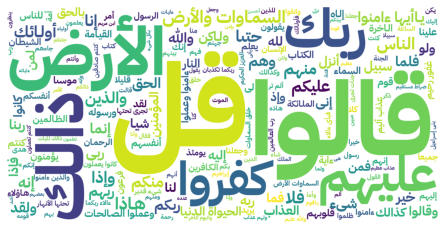

In [ ]:
print("Word Cloud pour tout le coran\n\n")
print_word_cloud_ar(wordsListNoStopWords)

In [ ]:
#creat dictionary
dictionary = corpora.Dictionary(df_Onlysoura['CleanSoura'])
#print(dictionary.num_nnz)
print(dictionary)

Dictionary(14581 unique tokens: ['أنعمت', 'الحمد', 'الدين', 'الرحمن', 'الرحيم']...)


In [ ]:
#creat document term matrix
doc_term_matrix = [dictionary.doc2bow(doc) for doc in df_Onlysoura['CleanSoura']]
print(len(doc_term_matrix))
#matrice qui stoque l'occurence et la frequence de chaque mot dans chaque soura
doc_term_matrix

114


[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 2),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 2),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1)],
 [(0, 3),
  (2, 3),
  (3, 2),
  (4, 6),
  (6, 1),
  (7, 4),
  (8, 217),
  (12, 1),
  (13, 2),
  (14, 2),
  (15, 16),
  (16, 12),
  (19, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 2),
  (30, 2),
  (31, 3),
  (32, 1),
  (33, 4),
  (34, 1),
  (35, 8),
  (36, 5),
  (37, 1),
  (38, 30),
  (39, 3),
  (40, 1),
  (41, 1),
  (42, 4),
  (43, 6),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 4),
  (64, 2),
  (65, 3),
  (66, 1),
  (67, 1),
  (68, 2),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 2),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),

In [ ]:
#Instantiate LDA model
lda = gensim.models.ldamodel.LdaModel

In [ ]:
#Fit LDA model on teh dataset
num_topics = 3
%time ldamodel = lda(doc_term_matrix,num_topics=num_topics,id2word=dictionary,passes=50,minimum_probability=0)

CPU times: user 13.6 s, sys: 45.4 ms, total: 13.7 s
Wall time: 13.6 s


In [ ]:
#print the topics identified by LDA model
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.022*"الله" + 0.006*"كانوا" + 0.005*"الأرض" + 0.005*"قالوا" + 0.005*"ربك" + 0.005*"قل" + 0.004*"كنتم" + 0.003*"إنا" + 0.003*"رب" + 0.003*"والأرض"'),
 (1,
  '0.045*"الله" + 0.006*"والله" + 0.006*"آمنوا" + 0.005*"قل" + 0.004*"الأرض" + 0.004*"الكتاب" + 0.004*"عليكم" + 0.004*"عليهم" + 0.004*"أيها" + 0.003*"شيء"'),
 (2,
  '0.030*"الله" + 0.004*"الرحمن" + 0.003*"آمنوا" + 0.003*"والله" + 0.003*"الرحيم" + 0.003*"قالوا" + 0.003*"ربك" + 0.003*"بسم" + 0.002*"الأرض" + 0.002*"أيها"')]

In [ ]:
#find which sourat were marked in which cluster
lda_corpus = ldamodel[doc_term_matrix]
[doc for doc in lda_corpus]
#pour chaque soura, la probabilité de chaque topic (groupe) des 3

[[(0, 0.97071296), (1, 0.014651848), (2, 0.014635205)],
 [(0, 8.849997e-05), (1, 0.9998263), (2, 8.5181746e-05)],
 [(0, 0.0001552433), (1, 0.999695), (2, 0.0001497955)],
 [(0, 0.00013840935), (1, 0.9997227), (2, 0.0001388026)],
 [(0, 0.0001871321), (1, 0.9996309), (2, 0.00018195015)],
 [(0, 0.13741454), (1, 0.86240834), (2, 0.00017714528)],
 [(0, 0.99967843), (1, 0.00016587393), (2, 0.00015568225)],
 [(0, 0.00042405596), (1, 0.99915445), (2, 0.00042152376)],
 [(0, 0.00021297172), (1, 0.014231715), (2, 0.9855553)],
 [(0, 0.59896606), (1, 0.40073407), (2, 0.00029990938)],
 [(0, 0.9994335), (1, 0.00028763348), (2, 0.00027880844)],
 [(0, 0.00033096413), (1, 0.0003102639), (2, 0.9993588)],
 [(0, 0.99872893), (1, 0.00065999303), (2, 0.0006110525)],
 [(0, 0.9987163), (1, 0.00066282955), (2, 0.0006208659)],
 [(0, 0.99841744), (1, 0.0007873258), (2, 0.00079522573)],
 [(0, 0.9970578), (1, 0.0026458674), (2, 0.0002963967)],
 [(0, 0.00036589624), (1, 0.9992959), (2, 0.00033821765)],
 [(0, 0.000356